# Übungsblatt 7
## Präsenzaufgaben
### Aufgabe 1 &nbsp;&nbsp;&nbsp; CFG: Kongruenz in Nominalphrasen

Die folgende Grammatik entspricht der Grammatik von Übungsblatt 4 am Ende der Präsenzaufgaben. (Sie können also stattdessen auch Ihre im Zuge der Übung von damals selbst erstellte Grammatik als Grundlage verwenden.)

Orientieren Sie sich an folgender Tabelle zur Mehrdeutigkeit der Formen des bestimmen Artikels im Deutschen und passen Sie die Grammatik so an, dass sie nur noch grammatikalisch korrekte Nominalphrasen als Teil von Sätzen akzeptiert. Konzentrieren Sie sich auf die Kongruenz von Artikel und Nomen im Genus.

|Form|mögliche Merkmale|
|----|-----------------|
|der|[NUM=sg, GEN=mas, KAS=nom]|
||[NUM=sg, GEN=fem, KAS=dat]|
||[NUM=sg, GEN=fem, KAS=GEN]|
||[NUM=pl, KAS=GEN]|
|die|[NUM=sg, GEN=fem, KAS=nom]|
||[NUM=sg, GEN=fem, KAS=akk]|
||[NUM=pl, KAS=nom]|
||[NUM=pl, KAS=akk]|
|das|[NUM=sg, GEN=neu, KAS=nom]|
||[NUM=sg, GEN=neu, KAS=akk]|

In [1]:
grammar = """
S -> NP VP

NP -> DET[GEN=?x] NOM[GEN=?x]

NOM[GEN=?x] -> ADJ NOM[GEN=?x] | N[GEN=?x]

ADJ -> "schöne" | "kluge" | "dicke"

DET[GEN=mask,KAS=nom] -> "der"
DET[GEN=fem,KAS=dat] -> "der"

DET[GEN=fem,KAS=nom] -> "die"
DET[GEN=fem,KAS=akk] -> "die"
DET[GEN=neut,KAS=nom] -> "das"
DET[GEN=neut,KAS=akk] -> "das"

N[GEN=mask] -> "Mann"
N[GEN=fem] -> "Frau"
N[GEN=neut] -> "Buch"

VP -> V NP NP | V NP | V
V -> "gibt" | "schenkt" | "schläft" | "gefällt" | "kennt"
"""

In [2]:
import nltk
from IPython.display import display
import sys

def test_grammar(grammar, sentences):
    cfg = nltk.grammar.FeatureGrammar.fromstring(grammar)
    parser = nltk.parse.FeatureEarleyChartParser(cfg)
    
    for i, sent in enumerate(sentences, 1):
        print("Satz {}: {}".format(i, sent))
        sys.stdout.flush()
        results = parser.parse(sent.split())
        analyzed = False
        for tree in results:
            display(tree)  # tree.draw() oder print(tree)
            analyzed = True
        if not analyzed:
            print("Keine Analyse möglich", file=sys.stderr)
            sys.stderr.flush()

In [3]:
pos_sentences = [
    "der Mann schläft",
    "der schöne Mann schläft",
    "der Mann gibt der Frau das Buch"
]
neg_sentences = ["das Mann schläft", "das schöne Mann schläft"]

In [4]:
test_grammar(grammar, neg_sentences)

Satz 1: das Mann schläft


Keine Analyse möglich


Satz 2: das schöne Mann schläft


Keine Analyse möglich


Satz 1: der Mann schläft


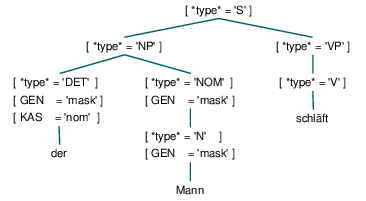

Satz 2: der schöne Mann schläft


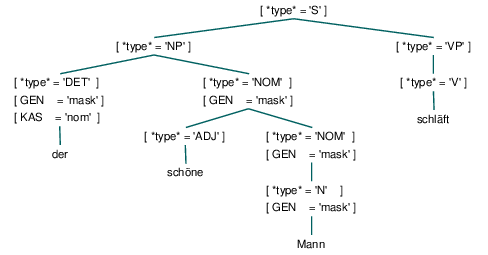

Satz 3: der Mann gibt der Frau das Buch


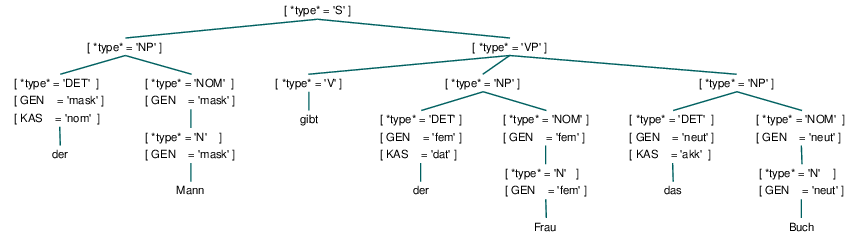

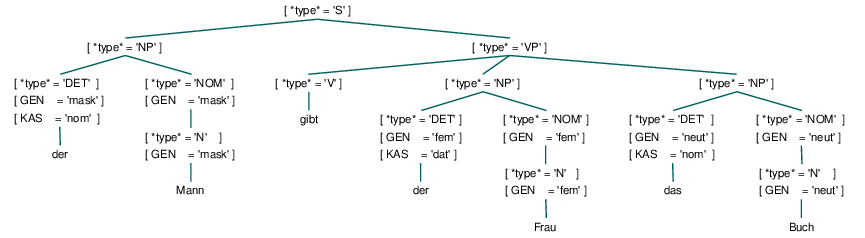

In [5]:
test_grammar(grammar, pos_sentences)

### Aufgabe 2 &nbsp;&nbsp;&nbsp; CFG: Kasus

Als nächstes sollen Kasusbedingungen in die Grammatik integriert werden:

1. Es gibt nur eine Nominalphrase im Nominativ (Subjekt).
1. Je nach Valenzstellen des Verbes sollen nur Nominalphrasen in den korrekten Kasus akzeptiert werden.
1. *Optional* Versuchen Sie die freie Satzstellung des Deutschen zu berücksichtigen.

In [6]:
grammar = """
S -> NP[KAS=nom] VP

NP[KAS=?y] -> DET[GEN=?x,KAS=?y] NOM[GEN=?x]

NOM[GEN=?x] -> ADJ NOM[GEN=?x] | N[GEN=?x]

ADJ -> "schöne" | "kluge" | "dicke"

DET[GEN=mask,KAS=nom] -> "der"
DET[GEN=fem,KAS=dat] -> "der"

DET[GEN=fem,KAS=nom] -> "die"
DET[GEN=fem,KAS=akk] -> "die"
DET[GEN=neut,KAS=nom] -> "das"
DET[GEN=neut,KAS=akk] -> "das"

N[GEN=mask] -> "Mann"
N[GEN=fem] -> "Frau"
N[GEN=neut] -> "Buch"

VP -> V[SUBCAT=ditr, VAL1=?x, VAL2=?y] NP[KAS=?x] NP[KAS=?y]
VP -> V[VAL=?x,SUBCAT=tr] NP[KAS=?x]
VP -> V[SUBCAT=intr]

V[SUBCAT=ditr, VAL1=dat, VAL2=akk] -> "gibt" | "schenkt"
V[SUBCAT=intr] -> "schläft"
V[SUBCAT=tr,VAL=dat] -> "gefällt"
V[SUBCAT=tr,VAL=akk] -> "kennt"
"""

In [7]:
pos_sentences.extend([
    "das Buch gefällt der Frau",
    "das Buch kennt die Frau"
])

neg_sentences.extend([
    "der Mann schläft das Buch",
    "die Frau gefällt das Buch",
    "das Buch kennt",
    "die Frau gibt das Buch",
    "die Frau gibt die Frau das Buch"
])

Satz 1: der Mann schläft


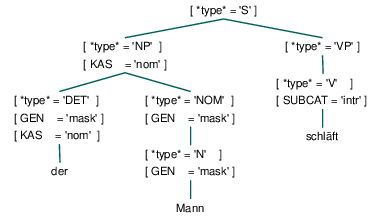

Satz 2: der schöne Mann schläft


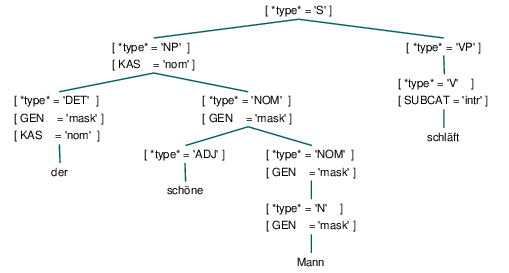

Satz 3: der Mann gibt der Frau das Buch


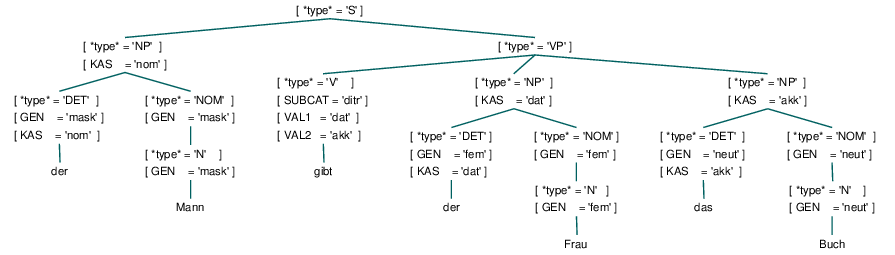

Satz 4: das Buch gefällt der Frau


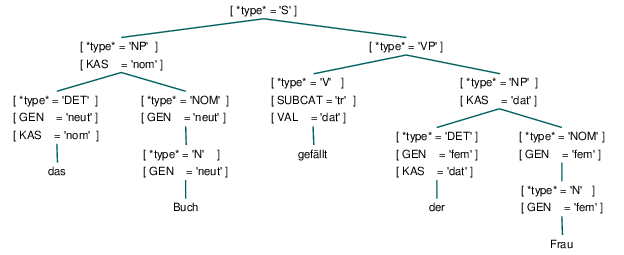

Satz 5: das Buch kennt die Frau


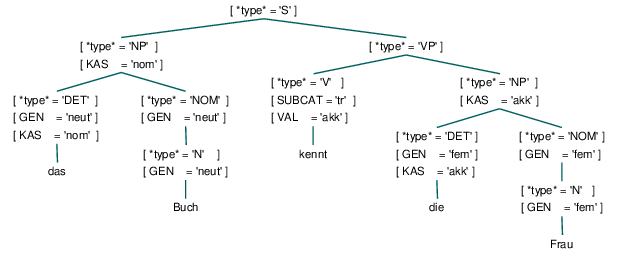

In [8]:
test_grammar(grammar, pos_sentences)

In [9]:
test_grammar(grammar, neg_sentences)

Satz 1: das Mann schläft


Keine Analyse möglich


Satz 2: das schöne Mann schläft


Keine Analyse möglich


Satz 3: der Mann schläft das Buch


Keine Analyse möglich


Satz 4: die Frau gefällt das Buch


Keine Analyse möglich


Satz 5: das Buch kennt


Keine Analyse möglich


Satz 6: die Frau gibt das Buch


Keine Analyse möglich


Satz 7: die Frau gibt die Frau das Buch


Keine Analyse möglich


## Hausaufgaben
### Aufgabe 7 &nbsp;&nbsp;&nbsp; Plural für das Subjekt

Ergänzen Sie die in den Präsenzaufgaben erstellte Grammatik um die Möglichkeit, das Subjekt in den Plural zu setzen.

Dafür müssen Sie folgendes tun:
  1. Erstellen Sie lexikalische Regeln für Pluralformen der Verben, Adjektive und Substantive (Nominativ ist ausreichend.).
  1. Vervollständigen Sie die lexikalischen Regeln für die Form des Artikels *die* um die korrekte Merkmalstruktur für den Plural.
  1. Formulieren Sie eine Kongruenzbedingung in Numerus zwischen Verb und Subjekt.

In [10]:
grammar = """
S -> NP[KAS=nom,NUM=?x] VP[NUM=?x]

NP[KAS=?y,NUM=?z] -> DET[GEN=?x,KAS=?y,NUM=?z] NOM[GEN=?x,NUM=?z]

NOM[GEN=?x,NUM=?z] -> ADJ[NUM=?z] NOM[GEN=?x,NUM=?z] | N[GEN=?x,NUM=?z]

ADJ[NUM=sg] -> "schöne" | "kluge" | "dicke"
ADJ[NUM=pl] -> "schönen" | "klugen" | "dicken"

DET[GEN=mask,KAS=nom,NUM=sg] -> "der"
DET[GEN=fem,KAS=dat,NUM=sg] -> "der"

DET[GEN=fem,KAS=nom,NUM=sg] -> "die"
DET[GEN=fem,KAS=akk,NUM=sg] -> "die"
DET[GEN=neut,KAS=nom,NUM=sg] -> "das"
DET[GEN=neut,KAS=akk,NUM=sg] -> "das"

DET[KAS=nom,NUM=pl] -> "die"
DET[KAS=akk,NUM=pl] -> "die"

N[GEN=mask,NUM=sg] -> "Mann"
N[GEN=mask,NUM=pl] -> "Männer"
N[GEN=fem,NUM=sg] -> "Frau"
N[GEN=fem,NUM=pl] -> "Frauen"
N[GEN=neut,NUM=sg] -> "Buch"
N[GEN=neut,NUM=pl] -> "Bücher"

VP[NUM=?z] -> V[SUBCAT=ditr, VAL1=?x, VAL2=?y, NUM=?z] NP[KAS=?x] NP[KAS=?y]
VP[NUM=?z] -> V[VAL=?x,SUBCAT=tr, NUM=?z] NP[KAS=?x]
VP[NUM=?z] -> V[SUBCAT=intr, NUM=?z]

V[SUBCAT=ditr, VAL1=dat, VAL2=akk,NUM=sg] -> "gibt" | "schenkt"
V[SUBCAT=ditr, VAL1=dat, VAL2=akk,NUM=pl] -> "geben" | "schenken"
V[SUBCAT=intr,NUM=sg] -> "schläft"
V[SUBCAT=intr,NUM=pl] -> "schlafen"
V[SUBCAT=tr,VAL=dat,NUM=sg] -> "gefällt"
V[SUBCAT=tr,VAL=dat,NUM=pl] -> "gefallen"
V[SUBCAT=tr,VAL=akk,NUM=sg] -> "kennt"
V[SUBCAT=tr,VAL=akk,NUM=pl] -> "kennen"
"""

In [11]:
pos_sentences.extend([
    "die Männer geben der Frau das Buch",
    "die Bücher gefallen der Frau",
    "die Frauen schlafen"
])

neg_sentences.extend([
    "der Mann geben der Frau das Buch",
    "das Buch gefällt der Frauen",
    "die Frauen schläft"
])

Satz 1: der Mann schläft


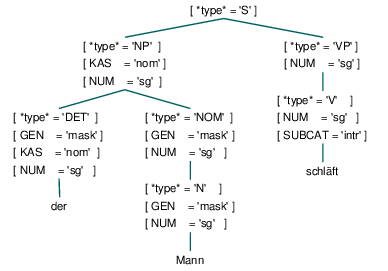

Satz 2: der schöne Mann schläft


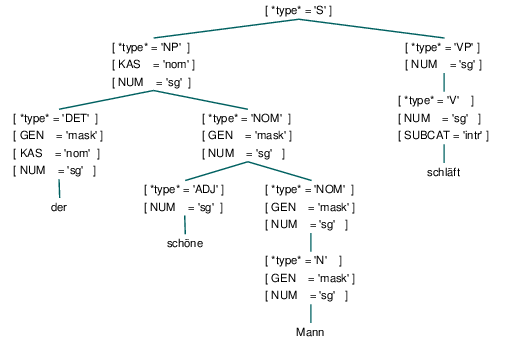

Satz 3: der Mann gibt der Frau das Buch


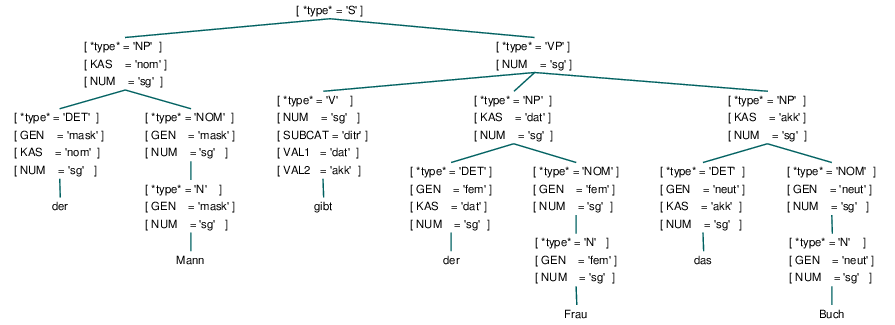

Satz 4: das Buch gefällt der Frau


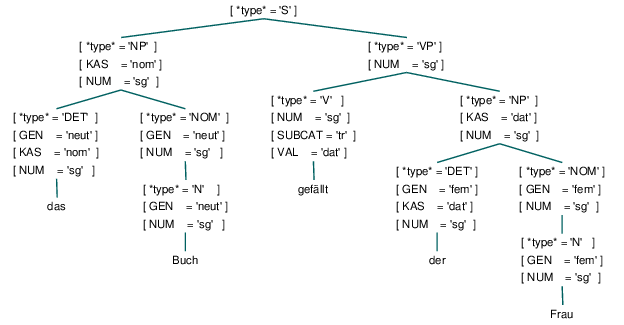

Satz 5: das Buch kennt die Frau


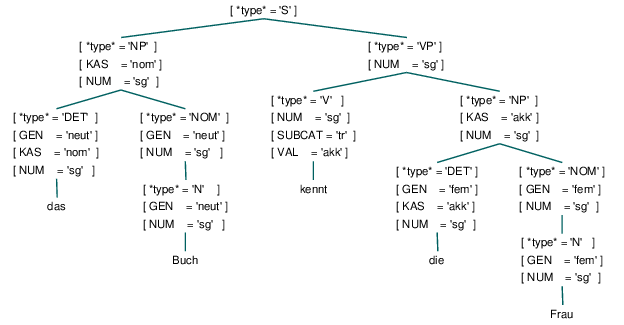

Satz 6: die Männer geben der Frau das Buch


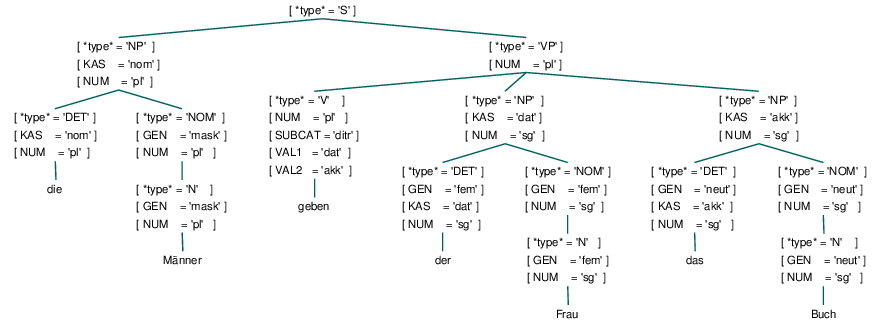

Satz 7: die Bücher gefallen der Frau


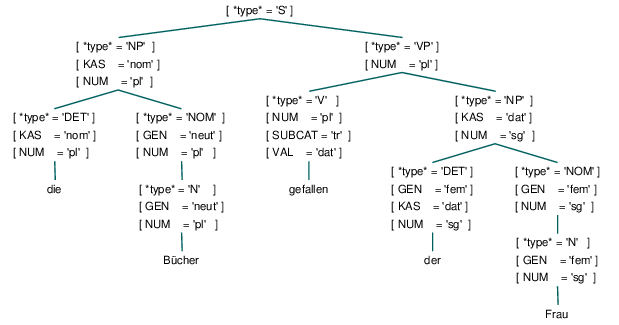

Satz 8: die Frauen schlafen


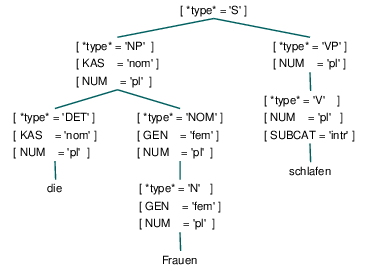

In [12]:
test_grammar(grammar, pos_sentences)

In [13]:
test_grammar(grammar, neg_sentences)

Satz 1: das Mann schläft


Keine Analyse möglich


Satz 2: das schöne Mann schläft


Keine Analyse möglich


Satz 3: der Mann schläft das Buch


Keine Analyse möglich


Satz 4: die Frau gefällt das Buch


Keine Analyse möglich


Satz 5: das Buch kennt


Keine Analyse möglich


Satz 6: die Frau gibt das Buch


Keine Analyse möglich


Satz 7: die Frau gibt die Frau das Buch


Keine Analyse möglich


Satz 8: der Mann geben der Frau das Buch


Keine Analyse möglich


Satz 9: das Buch gefällt der Frauen


Keine Analyse möglich


Satz 10: die Frauen schläft


Keine Analyse möglich


### Aufgabe 8 &nbsp;&nbsp;&nbsp; Adverben und Verbzweitstellung

Fügen Sie der Grammatik jetzt die zwei Adverben *heute* und *morgen* hinzu. Adverben können prinzipiell sehr frei im Satz platziert werden. Eine Besonderheit des Deutschen ist aber die sog. Verbzweitstellung, wie sie z. B. in Sätzen wie *Heute schläft der Mann.* deutlich wird.
Versuchen Sie alle Möglichkeiten zu implementieren:

In [14]:
grammar = """
S -> NP[KAS=nom,NUM=?x] VP[NUM=?x,-SBJ]
S -> ADV VP[+SBJ]

NP[KAS=?y,NUM=?z] -> DET[GEN=?x,KAS=?y,NUM=?z] NOM[GEN=?x,NUM=?z]

NOM[GEN=?x,NUM=?z] -> ADJ[NUM=?z] NOM[GEN=?x,NUM=?z] | N[GEN=?x,NUM=?z]

ADJ[NUM=sg] -> "schöne" | "kluge" | "dicke"
ADJ[NUM=pl] -> "schönen" | "klugen" | "dicken"

DET[GEN=mask,KAS=nom,NUM=sg] -> "der"
DET[GEN=fem,KAS=dat,NUM=sg] -> "der"

DET[GEN=fem,KAS=nom,NUM=sg] -> "die"
DET[GEN=fem,KAS=akk,NUM=sg] -> "die"
DET[GEN=neut,KAS=nom,NUM=sg] -> "das"
DET[GEN=neut,KAS=akk,NUM=sg] -> "das"

DET[KAS=nom,NUM=pl] -> "die"
DET[KAS=akk,NUM=pl] -> "die"

N[GEN=mask,NUM=sg] -> "Mann"
N[GEN=mask,NUM=pl] -> "Männer"
N[GEN=fem,NUM=sg] -> "Frau"
N[GEN=fem,NUM=pl] -> "Frauen"
N[GEN=neut,NUM=sg] -> "Buch"
N[GEN=neut,NUM=pl] -> "Bücher"

VP[NUM=?z,+SBJ] -> V[SUBCAT=ditr, VAL1=?x, VAL2=?y, NUM=?z] NP[KAS=nom,NUM=?z] NP[KAS=?x] NP[KAS=?y]
VP[NUM=?z,-SBJ] -> V[SUBCAT=ditr, VAL1=?x, VAL2=?y, NUM=?z] NP[KAS=?x] NP[KAS=?y]
VP[NUM=?z,-SBJ] -> V[SUBCAT=ditr, VAL1=?x, VAL2=?y, NUM=?z] ADV NP[KAS=?x] NP[KAS=?y]
VP[NUM=?z,-SBJ] -> V[SUBCAT=ditr, VAL1=?x, VAL2=?y, NUM=?z] NP[KAS=?x] ADV NP[KAS=?y]
VP[NUM=?z,-SBJ] -> V[SUBCAT=ditr, VAL1=?x, VAL2=?y, NUM=?z] NP[KAS=?x] NP[KAS=?y] ADV

VP[NUM=?z,+SBJ] -> V[VAL=?x,SUBCAT=tr, NUM=?z] NP[KAS=nom,NUM=?z] NP[KAS=?x]
VP[NUM=?z,-SBJ] -> V[VAL=?x,SUBCAT=tr, NUM=?z] NP[KAS=?x]
VP[NUM=?z,-SBJ] -> V[VAL=?x,SUBCAT=tr, NUM=?z] ADV NP[KAS=?x]
VP[NUM=?z,-SBJ] -> V[VAL=?x,SUBCAT=tr, NUM=?z] NP[KAS=?x] ADV

VP[NUM=?z,+SBJ] -> V[SUBCAT=intr, NUM=?z] NP[KAS=nom,NUM=?z]
VP[NUM=?z,-SBJ] -> V[SUBCAT=intr, NUM=?z]
VP[NUM=?z,-SBJ] -> V[SUBCAT=intr, NUM=?z] ADV

V[SUBCAT=ditr, VAL1=dat, VAL2=akk,NUM=sg] -> "gibt" | "schenkt"
V[SUBCAT=ditr, VAL1=dat, VAL2=akk,NUM=pl] -> "geben" | "schenken"
V[SUBCAT=intr,NUM=sg] -> "schläft"
V[SUBCAT=intr,NUM=pl] -> "schlafen"
V[SUBCAT=tr,VAL=dat,NUM=sg] -> "gefällt"
V[SUBCAT=tr,VAL=dat,NUM=pl] -> "gefallen"
V[SUBCAT=tr,VAL=akk,NUM=sg] -> "kennt"
V[SUBCAT=tr,VAL=akk,NUM=pl] -> "kennen"

ADV -> "heute" | "morgen"
"""

In [15]:
pos_sentences.extend([
  "heute gibt der Mann der Frau das Buch",
  "der Mann gibt heute der Frau das Buch",
  "der Mann gibt der Frau heute das Buch",
  "der Mann gibt der Frau das Buch heute",
  "heute geben die Männer der Frau das Buch"
])

neg_sentences.extend([
    "heute der Mann gibt der Frau das Buch",
    "heute gibt der Frau das Buch",
    "heute geben der Mann der Frau das Buch"
])

Satz 1: der Mann schläft


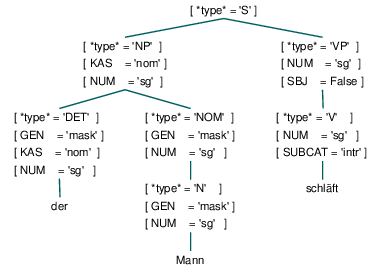

Satz 2: der schöne Mann schläft


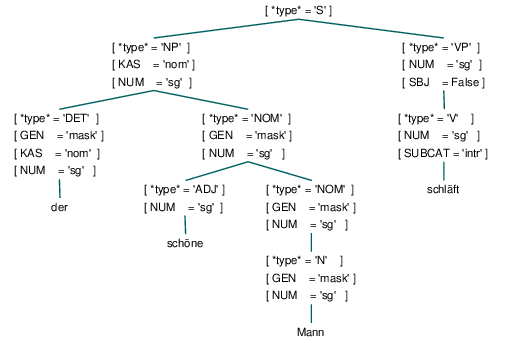

Satz 3: der Mann gibt der Frau das Buch


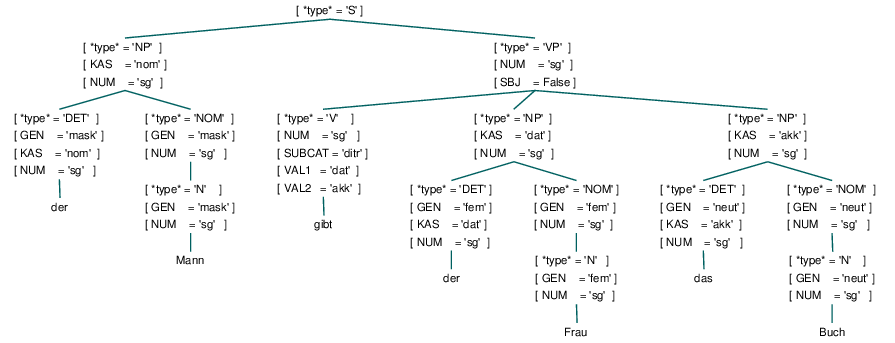

Satz 4: das Buch gefällt der Frau


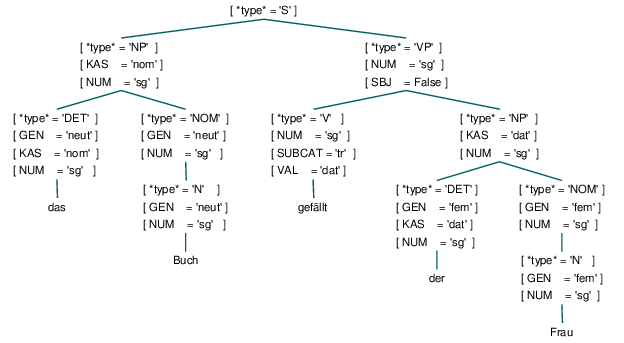

Satz 5: das Buch kennt die Frau


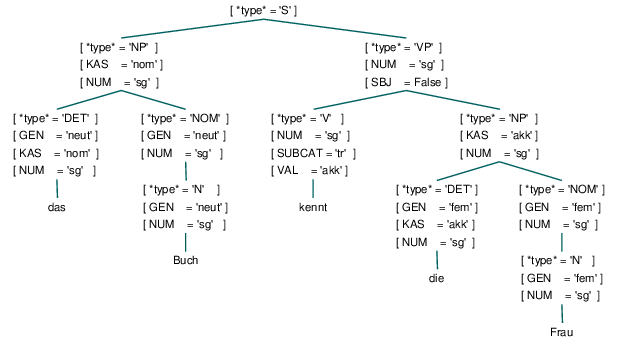

Satz 6: die Männer geben der Frau das Buch


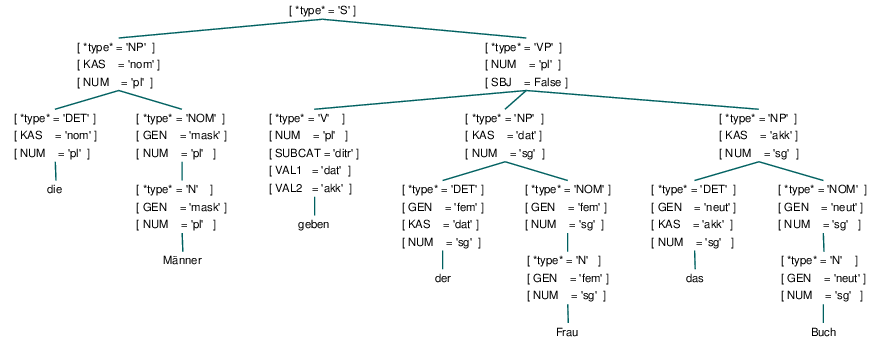

Satz 7: die Bücher gefallen der Frau


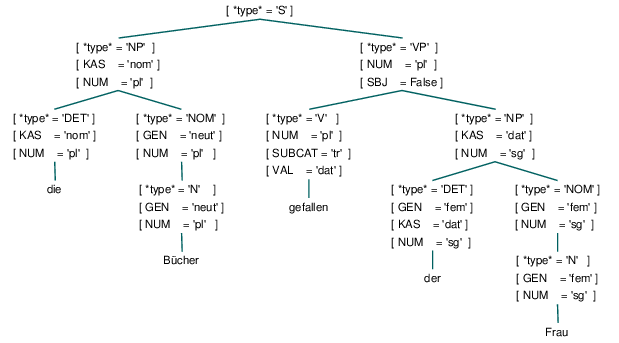

Satz 8: die Frauen schlafen


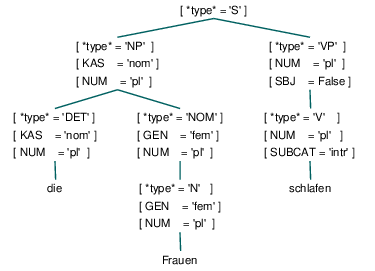

Satz 9: heute gibt der Mann der Frau das Buch


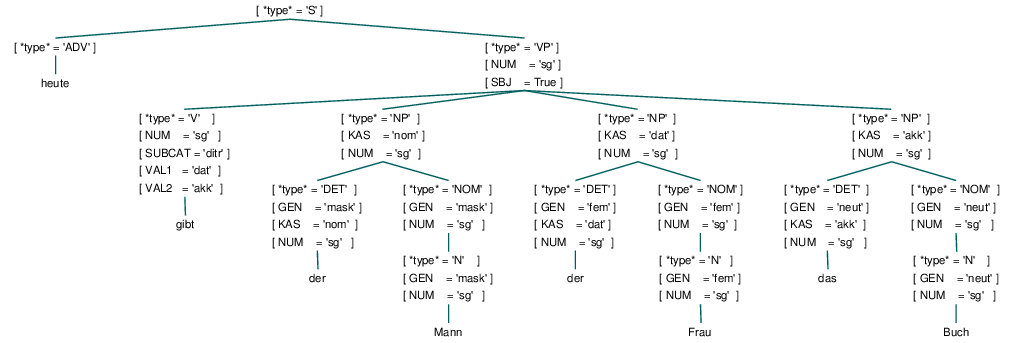

Satz 10: der Mann gibt heute der Frau das Buch


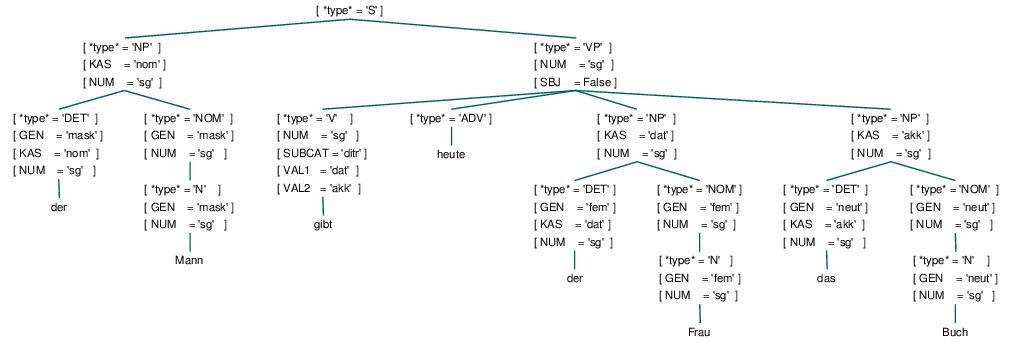

Satz 11: der Mann gibt der Frau heute das Buch


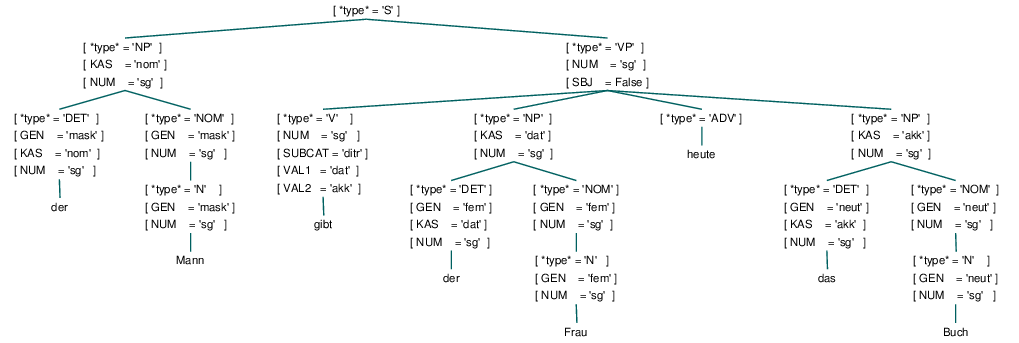

Satz 12: der Mann gibt der Frau das Buch heute


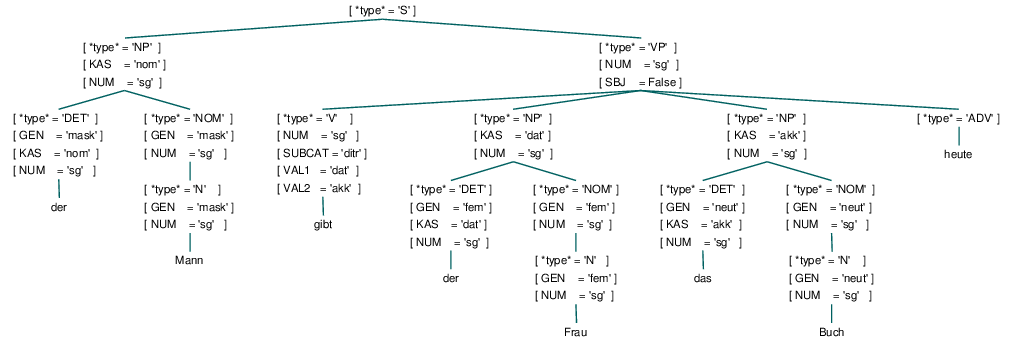

Satz 13: heute geben die Männer der Frau das Buch


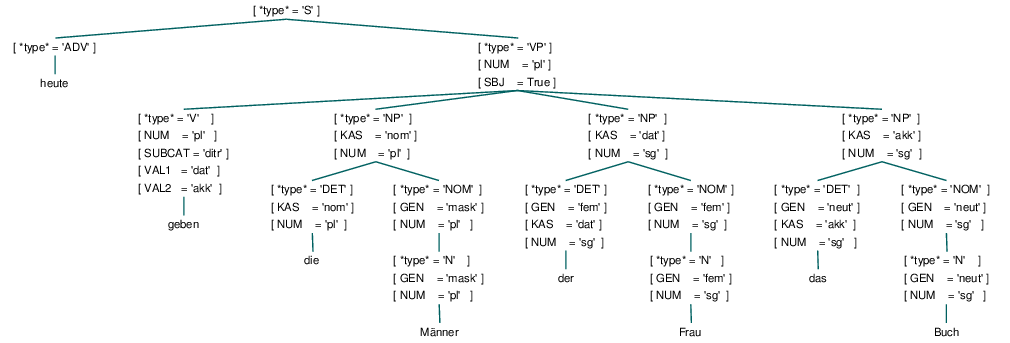

In [16]:
test_grammar(grammar, pos_sentences)

In [17]:
test_grammar(grammar, neg_sentences)

Satz 1: das Mann schläft


Keine Analyse möglich


Satz 2: das schöne Mann schläft


Keine Analyse möglich


Satz 3: der Mann schläft das Buch


Keine Analyse möglich


Satz 4: die Frau gefällt das Buch


Keine Analyse möglich


Satz 5: das Buch kennt


Keine Analyse möglich


Satz 6: die Frau gibt das Buch


Keine Analyse möglich


Satz 7: die Frau gibt die Frau das Buch


Keine Analyse möglich


Satz 8: der Mann geben der Frau das Buch


Keine Analyse möglich


Satz 9: das Buch gefällt der Frauen


Keine Analyse möglich


Satz 10: die Frauen schläft


Keine Analyse möglich


Satz 11: heute der Mann gibt der Frau das Buch


Keine Analyse möglich


Satz 12: heute gibt der Frau das Buch


Keine Analyse möglich


Satz 13: heute geben der Mann der Frau das Buch


Keine Analyse möglich
